In [81]:
import practicalSPARQL
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [82]:
path_to_xlsx = 'G:\\My Drive\\DataFiles\\Full_Image_List_6.5.24\\all_elements_all_ck_ucks.xlsx'

In [83]:
all_elements_with_uck = pd.read_excel(path_to_xlsx)

In [84]:
path_to_xlsx1 = 'G:\\My Drive\\DataFiles\\Full_Image_List_6.5.24\\all_elements_with_part_type.xlsx'

In [85]:
all_elements_full_info = pd.read_excel(path_to_xlsx1)

In [86]:
path_to_csv = 'G:\\My Drive\\DataFiles\\booksSacrobosco.csv'

In [87]:
all_books = pd.read_csv(path_to_csv)

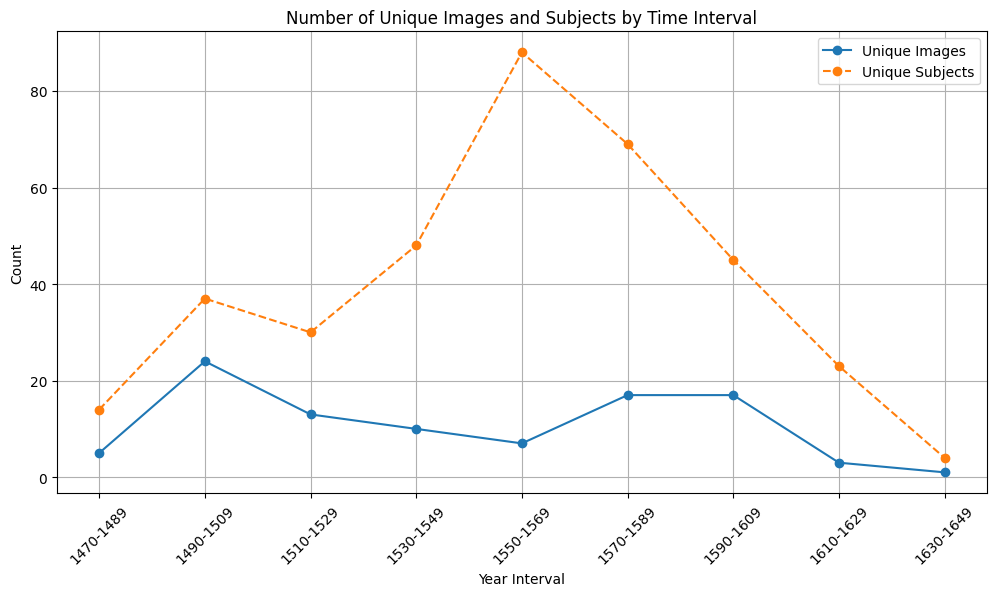

In [88]:
# Filter rows that contain the keyword 'CK_Structure of the Sublunar World'
filtered_df = all_elements_full_info[all_elements_full_info['keywords'].str.contains('CK_Structure of the Sublunar World')]

# Filter for the years 1480 to 1650
filtered_df = filtered_df[(filtered_df['year'] >= 1470) & (filtered_df['year'] <= 1650)].copy()

# Define the 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column 'year_interval' to hold the 20-year intervals in filtered_df
filtered_df['year_interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Group by year_interval and count unique images
grouped_images = filtered_df.groupby('year_interval', observed=True)['images'].nunique().reset_index()

# Create a new column 'year_interval' to hold the 20-year intervals in all_books
all_books['year_interval'] = pd.cut(all_books['year_published_from'], bins=bins, labels=labels, right=False)

# Group by year_interval and count unique subjects
grouped_subjects = all_books.groupby('year_interval', observed=True)['subject'].nunique().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))

# Plot unique images
plt.plot(grouped_images['year_interval'], grouped_images['images'], marker='o', label='Unique Images')

# Plot unique subjects
plt.plot(grouped_subjects['year_interval'], grouped_subjects['subject'], marker='o', linestyle='--', label='Unique Subjects')

plt.title('Number of Unique Images and Subjects by Time Interval')
plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

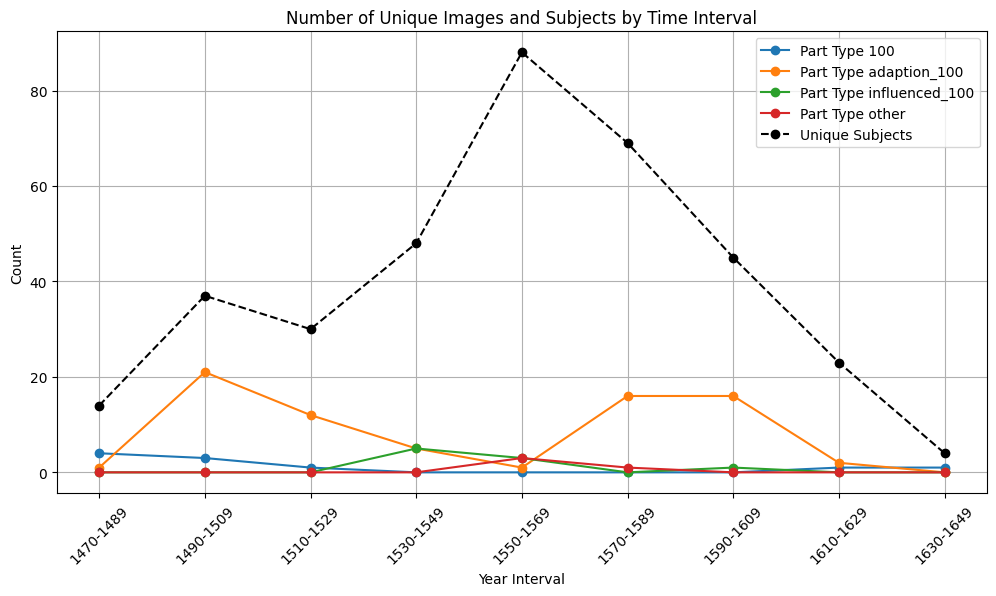

In [89]:
# Filter rows that contain the keyword 'CK_Structure of the Sublunar World'
filtered_df = all_elements_full_info[all_elements_full_info['keywords'].str.contains('CK_Structure of the Sublunar World')]

# Filter for the years 1480 to 1650
filtered_df = filtered_df[(filtered_df['year'] >= 1470) & (filtered_df['year'] <= 1650)].copy()

# Define the 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column 'year_interval' to hold the 20-year intervals in filtered_df
filtered_df['year_interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Group by year_interval and count unique images
grouped_images = filtered_df.groupby(['year_interval', 'part_type'], observed=True)['images'].nunique().reset_index()

# Pivot the table for easier plotting
pivot_images = grouped_images.pivot(index='year_interval', columns='part_type', values='images').fillna(0)

# Create a new column 'year_interval' in all_books
all_books['year_interval'] = pd.cut(all_books['year_published_from'], bins=bins, labels=labels, right=False)

# Group by year_interval and count unique subjects
grouped_subjects = all_books.groupby('year_interval', observed=True)['subject'].nunique().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))

# Plot unique images
for part_type in pivot_images.columns:
    plt.plot(pivot_images.index, pivot_images[part_type], marker='o', label=f'Part Type {part_type}')

# Plot unique subjects
plt.plot(grouped_subjects['year_interval'], grouped_subjects['subject'], marker='o', linestyle='--', color='black', label='Unique Subjects')

plt.title('Number of Unique Images and Subjects by Time Interval')
plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

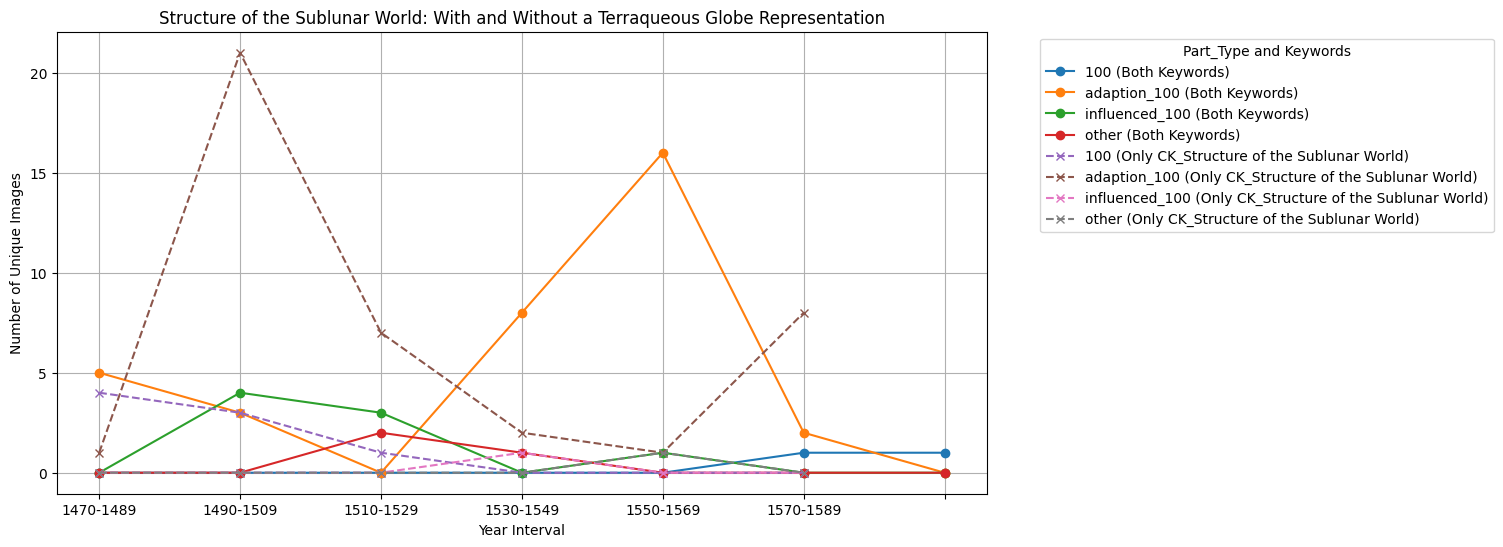

In [94]:
# Filter rows that contain the keyword 'CK_Structure of the Sublunar World'
filtered_df = all_elements_full_info[all_elements_full_info['keywords'].str.contains('CK_Structure of the Sublunar World')]

# Filter for the years 1480 to 1650
filtered_df = filtered_df[(filtered_df['year'] >= 1470) & (filtered_df['year'] <= 1650)].copy()

# Define the 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column 'year_interval' to hold the 20-year intervals
filtered_df.loc[:, 'year_interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Filter rows that also contain 'CK_Terraqueous Globe'
both_keywords_df = filtered_df[filtered_df['keywords'].str.contains('CK_Terraqueous Globe')]

# Filter rows that only contain 'CK_Structure of the Sublunar World'
only_sublunar_df = filtered_df[~filtered_df['keywords'].str.contains('CK_Terraqueous Globe')]

# Group by interval and part_type, and count unique images
grouped_both = both_keywords_df.groupby(['year_interval', 'part_type'], observed=True)['images'].nunique().reset_index()
grouped_only = only_sublunar_df.groupby(['year_interval', 'part_type'], observed=True)['images'].nunique().reset_index()

# Pivot the tables for easier plotting
pivot_both_df = grouped_both.pivot(index='year_interval', columns='part_type', values='images').fillna(0)
pivot_only_df = grouped_only.pivot(index='year_interval', columns='part_type', values='images').fillna(0)

# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
for col in pivot_both_df.columns:
    pivot_both_df[col].plot(kind='line', marker='o', ax=ax, linestyle='-', label=f'{col} (Both Keywords)')
for col in pivot_only_df.columns:
    pivot_only_df[col].plot(kind='line', marker='x', ax=ax, linestyle='--', label=f'{col} (Only CK_Structure of the Sublunar World)')
plt.title('Structure of the Sublunar World: With and Without a Terraqueous Globe Representation')
plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Images')
plt.legend(title='Part_Type and Keywords', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

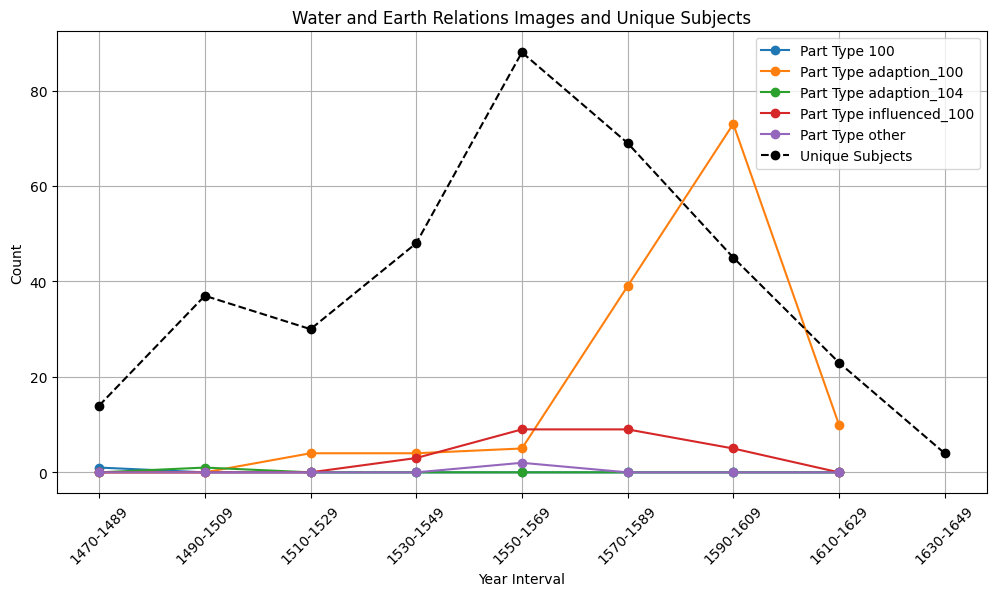

In [92]:
# Filter rows that contain the keyword 'CK_Relation Between the Spheres of Water and Earth'
water_earth = all_elements_full_info[all_elements_full_info['keywords'].str.contains('CK_Relation Between the Spheres of Water and Earth')]

# Filter for the years 1480 to 1650
water_earth = water_earth[(water_earth['year'] >= 1470) & (water_earth['year'] <= 1650)].copy()

# Define the 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column 'year_interval' to hold the 20-year intervals in water_earth
water_earth['year_interval'] = pd.cut(water_earth['year'], bins=bins, labels=labels, right=True)

# Group by year_interval and part_type, and count unique images
grouped = water_earth.groupby(['year_interval', 'part_type'], observed=True)['images'].nunique().reset_index()

# Pivot the table for easier plotting
pivot_df = grouped.pivot(index='year_interval', columns='part_type', values='images').fillna(0)

# Create a new column 'year_interval' in all_books
all_books['year_interval'] = pd.cut(all_books['year_published_from'], bins=bins, labels=labels, right=False)

# Group by year_interval and count unique subjects
grouped_subjects = all_books.groupby('year_interval', observed=True)['subject'].nunique().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))

# Plot unique images for each part_type
for part_type in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[part_type], marker='o', label=f'Part Type {part_type}')

# Plot unique subjects
plt.plot(grouped_subjects['year_interval'], grouped_subjects['subject'], marker='o', linestyle='--', color='black', label='Unique Subjects')

plt.title('Water and Earth Relations Images and Unique Subjects')
plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()